<a href="https://colab.research.google.com/github/atanu22-iitk/DLCV/blob/main/Assignment_dlcv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Showing Data:
File contain 0  is: b'batch_label'
File contain 1  is: b'labels'
File contain 2  is: b'data'
File contain 3  is: b'filenames'
255
Original Image:


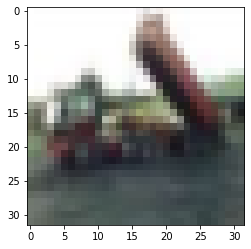

Enhanced Image:


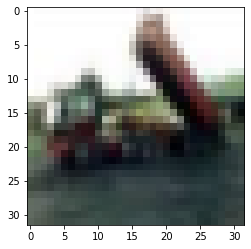

255
Posterized Image:


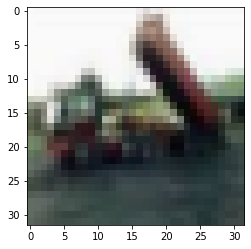

250
Rotated Image:
Rotating image by 0times :


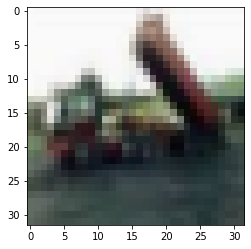

Changing contrast of the image by 0.86 factors :
Edited Image:


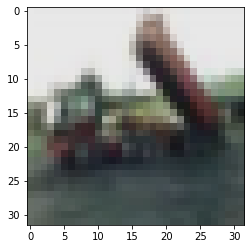

Flipped Image:


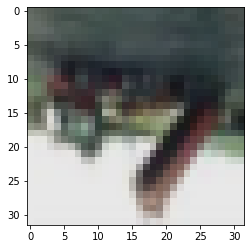

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



def read_data(file):
  import pickle
  data=open(file, 'rb')
  dict = pickle.load(data, encoding='bytes')
  return dict

def image_array(image_data):
    global R_ch,G_ch,B_ch
    R_ch=np.array([image_data[b'data'][2,:32]])
    G_ch=np.array([image_data[b'data'][2,1024:1056]])
    B_ch=np.array([image_data[b'data'][2,2048:2080]])

    for i in range(32,1024,32):
        data_R=np.array(image_data[b'data'][2,i:i+32])
        R_ch=np.append(R_ch, [data_R], axis=0)
        i+=32

    for i in range(1056,2048,32):
        data_G=np.array(image_data[b'data'][2,i:i+32])
        G_ch=np.append(G_ch, [data_G], axis=0)
        i+=32

    for i in range(2080,3072,32):
        data_B=np.array(image_data[b'data'][2,i:i+32])
        B_ch=np.append(B_ch, [data_B], axis=0)
        i+=32

    # print('Red:',R_ch)
    # print('Green:',G_ch)
    # print('Blue:',B_ch)
    # print(type(R_ch))
    
    # print(R_ch.shape)
    # print(G_ch.shape)
    # print(B_ch.shape)
    
    image=np.dstack((R_ch,G_ch,B_ch))

    # print(image)
    print(image[1,1][2])
    # print(image.shape)
    print('Original Image:')
    plt.imshow(image)
    plt.show()
    # plt.imshow(R_ch)
    # plt.show()
    # plt.imshow(G_ch)
    # plt.show()
    # plt.imshow(B_ch)
    # plt.show()
    return image

def img_poster(image):
  #range=r,divider=d
  sel_min=5
  sel_max=250
  r = sel_max - sel_min
  d = 255/r
  for i in range(0,32,1):
    for j in range(0,32,1):
      image[i,j][0]=(image[i,j][0]/d) + sel_min
      image[i,j][1]=(image[i,j][1]/d) + sel_min
      image[i,j][2]=(image[i,j][2]/d) + sel_min
  return image

def img_enhance(image):
  for i in range(0,32,1):
    for j in range(0,32,1):
      image[i,j][0]=((image[i,j][0]-R_min_max[0])/(R_min_max[1]-R_min_max[0]))*255
      image[i,j][1]=((image[i,j][1]-G_min_max[0])/(G_min_max[1]-G_min_max[0]))*255
      image[i,j][2]=((image[i,j][2]-B_min_max[0])/(B_min_max[1]-B_min_max[0]))*255

  return image

def min_max(arr):
  min=np.min(arr)
  max=np.max(arr)
  return min, max

def rotate(image):
  # Generate a random angle between 0 and 360
  angle = np.random.uniform(-180, 180)
  k = int(angle / 90)
  # Rotate the array
  rotated_image = np.rot90(image, k )
  print('Rotating image by '+ str(k) +'times :')
  return rotated_image

def contrast_flipping(image):
  alpha=np.round((np.random.uniform(0.5,2.0)), 2)
  print('Changing contrast of the image by '+ str(alpha) +' factors :')
  for i in range(0,32,1):
    for j in range(0,32,1):
      image[i,j][0]=alpha*(image[i,j][0] - 128) + 128
      image[i,j][1]=alpha*(image[i,j][1] - 128) + 128
      image[i,j][2]=alpha*(image[i,j][2] - 128) + 128
  
  flipped_image=np.flip(image, axis=0)
  return image,flipped_image

def rand_img_sel(image_data):
  
  x=np.random.randint(1,10000)
  R_ch_x=np.array([image_data[b'data'][x,:32]])
  G_ch_x=np.array([image_data[b'data'][x,1024:1056]])
  B_ch_x=np.array([image_data[b'data'][x,2048:2080]])

  for i in range(32,1024,32):
        data_R=np.array(image_data[b'data'][x,i:i+32])
        R_ch_x=np.append(R_ch, [data_R], axis=0)
        i+=32

  for i in range(1056,2048,32):
        data_G=np.array(image_data[b'data'][x,i:i+32])
        G_ch_x=np.append(G_ch, [data_G], axis=0)
        i+=32

  for i in range(2080,3072,32):
        data_B=np.array(image_data[b'data'][x,i:i+32])
        B_ch_x=np.append(B_ch, [data_B], axis=0)
        i+=32
  rand_image=np.dstack((R_ch_x,G_ch_x,B_ch_x))
  return rand_image

def augmentation(random_image):
  sel_function = np.random.randint(1,4)
  print(sel_function)
  if sel_function==1:
      augmented_image=img_enhance(random_image)
  elif sel_function==2:
      augmented_image=img_poster(random_image)
  elif sel_function==3:
      augmented_image=rotate(random_image)
  else:
      augmented_image=contrast_flipping(random_image)
  return augmented_image

def main():
    file='/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_1'
    image_data=read_data(file)
    print('Showing Data:')
    cnt=0
    for item in image_data:
      print('File contain',cnt,' is:', item)
      cnt +=1
    new_image = np.array(image_array(image_data))
    
    # print(new_image.shape)
    # print(new_image)
    global R_min_max, G_min_max, B_min_max
    R_min_max=min_max(R_ch)
    G_min_max=min_max(G_ch)
    B_min_max=min_max(B_ch)
    # print('Rmin:',R_min_max[0])
    # print('Rmax:',R_min_max[1])
    # print('Gmin:',G_min_max[0])
    # print('Gmax:',G_min_max[1])
    # print('Bmin:',B_min_max[0])
    # print('Bmax:',B_min_max[1])

    Enhanced_image=img_enhance(new_image)
    print('Enhanced Image:')
    plt.imshow(Enhanced_image)
    plt.show()
    print(Enhanced_image[1,1][2])

    Posterize_image=img_poster(new_image)
    print('Posterized Image:')
    plt.imshow(Posterize_image)
    plt.show() 
    print(Posterize_image[1,1][2])

    print('Rotated Image:')
    plt.imshow(rotate(new_image))
    plt.show()

    Edited_image = contrast_flipping(new_image)
    print('Edited Image:')
    plt.imshow(Edited_image[0])
    plt.show()

    print('Flipped Image:')
    plt.imshow(Edited_image[1])
    plt.show()
# driver code
if __name__ == "__main__":
    
  # function call
  main()




